In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [18]:
data = pd.read_csv("./CFB2019.csv")

#remove conference from Team column and put into own column
team_split = data['Team'].str.split("(")
data["Team"] = team_split.str.get(0)
conf = team_split.str.get(1)
conf = conf.str.replace(")", " ")
data["Conference"]=conf.str.strip()

data.set_index("Team", inplace=True)
data.head()




,Games,Win-Loss,Off Rank,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,Def Rank,Def Plays,...,Turnover Rank,Fumbles Recovered,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown.y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game,Conference
Team,,,,,,,,,,,,,,,,,,,,,
Air Force,13,11-2,51,881,5483,6.22,55,421.8,17,752,...,78,9,7,16,12,6,18,-2,-0.15,Mountain West
Akron,12,0-12,130,725,2918,4.02,14,243.2,83,871,...,128,6,5,11,12,14,26,-15,-1.25,MAC
Alabama,13,11-2,6,842,6640,7.89,76,510.8,20,877,...,3,11,17,28,4,6,10,18,1.38,SEC
Appalachian St.,14,13-1,39,969,6064,6.26,65,433.1,26,940,...,7,10,14,24,3,6,9,15,1.07,Sun Belt
Arizona,12,4-8,30,873,5281,6.05,42,440.1,120,889,...,89,4,11,15,6,12,18,-3,-0.25,Pac-12


In [31]:
#Split wins and losses to get wins only and calculate win percentage
wins = data["Win-Loss"].str.split("-")
data['Wins'] = wins.str.get(0)
data['Wins'] = pd.to_numeric(data['Wins'])
data['Games'] = pd.to_numeric(data['Games'])
data['win_perc'] = round(data['Wins']/data['Games'],2)

data.head()


,Games,Win-Loss,Off Rank,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,Def Rank,Def Plays,...,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown.y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game,Conference,Wins,win_perc
Team,,,,,,,,,,,,,,,,,,,,,
Air Force,13,11-2,51,881,5483,6.22,55,421.8,17,752,...,7,16,12,6,18,-2,-0.15,Mountain West,11,0.85
Akron,12,0-12,130,725,2918,4.02,14,243.2,83,871,...,5,11,12,14,26,-15,-1.25,MAC,0,0.00
Alabama,13,11-2,6,842,6640,7.89,76,510.8,20,877,...,17,28,4,6,10,18,1.38,SEC,11,0.85
Appalachian St.,14,13-1,39,969,6064,6.26,65,433.1,26,940,...,14,24,3,6,9,15,1.07,Sun Belt,13,0.93
Arizona,12,4-8,30,873,5281,6.05,42,440.1,120,889,...,11,15,6,12,18,-3,-0.25,Pac-12,4,0.33


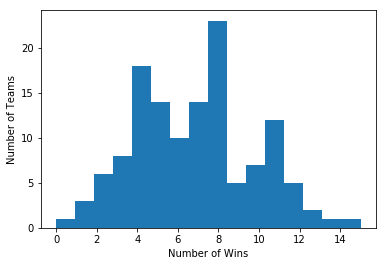

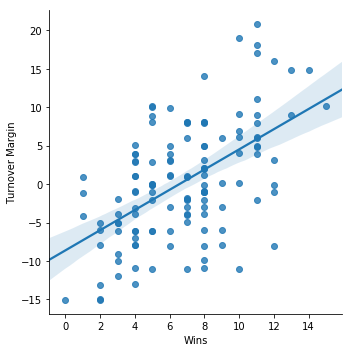

In [30]:
plt.hist(data.Wins, bins=16)
plt.xlabel("Number of Wins")
plt.ylabel("Number of Teams")
sns.lmplot("Wins", "Turnover Margin", data, y_jitter = .15)

In [49]:
#selects a filter by SEC in the conference column-produces a boolean response
sec = data["Conference"] == "SEC"

#filters dataframe based on True booleans
SEC_teams = data[sec]

#selects columns from larger frame and creates new frame
SEC_teams = SEC_teams[['Wins','Turnover Margin']]
SEC_teams





,Wins,Turnover Margin
Team,,
Alabama,11,18
Arkansas,2,-5
Auburn,9,6
Florida,11,5
Georgia,12,3
Kentucky,8,-1
LSU,15,10
Mississippi St.,6,1
Missouri,6,1


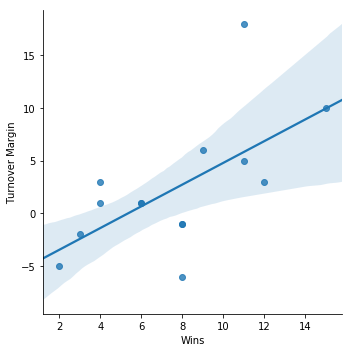

In [50]:
sns.lmplot('Wins', 'Turnover Margin', SEC_teams)

In [41]:
acc = data["Conference"] == "ACC"

#filters dataframe based on True booleans
ACC_teams = data[acc]

#selects columns from larger frame and creates new frame
ACC_teams = ACC_teams[['Wins','Turnover Margin']]
ACC_teams

,Wins,Turnover Margin
Team,,
Boston College,6,5
Clemson,14,15
Duke,5,-11
Florida St.,6,-3
Georgia Tech,3,-4
Louisville,8,-1
NC State,4,-13
North Carolina,7,8
Pittsburgh,8,-8


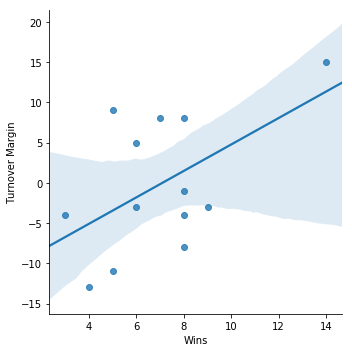

In [42]:
sns.lmplot('Wins', 'Turnover Margin', ACC_teams)